# Лабораторная работа: Геометрические алгоритмы в 2D


## Часть 1: Попадание точки в круг и треугольник

### Задание: Проверка геометрических положений

Реализуйте классы **Point**, **Circle** и **Triangle** для проверки попадания точки в круг и треугольник, аналогично лекции 9.

**Класс Point** хранит координаты `x, y` с методом `__str__`.

**Класс Circle** содержит центр (`Point`) и радиус, с методом для проверки `point_in_circle(point)`.

**Класс Triangle** содержит три вершины (`Point`), с методом `point_in_triangle(point)` на основе векторного произведения (barycentric coordinates).

**Генератор случайных точек** внутри ограничивающего прямоугольника, содержащего фигуры:

Создайте генератор `generate_points(xmin, xmax, ymin, ymax, n)`, который случайно создаёт `n` точек с координатами в данном диапазоне.

**Проверку** для всех сгенерированных точек попадания в круг и треугольник.

**Визуализацию** с помощью matplotlib:

- Отобразите круг и треугольник.
- Отметьте **зелёным** цветом точки, попавшие внутрь фигуры, **красным** — вне.
- Используйте различные маркеры для точек в круге и в треугольнике для наглядности.


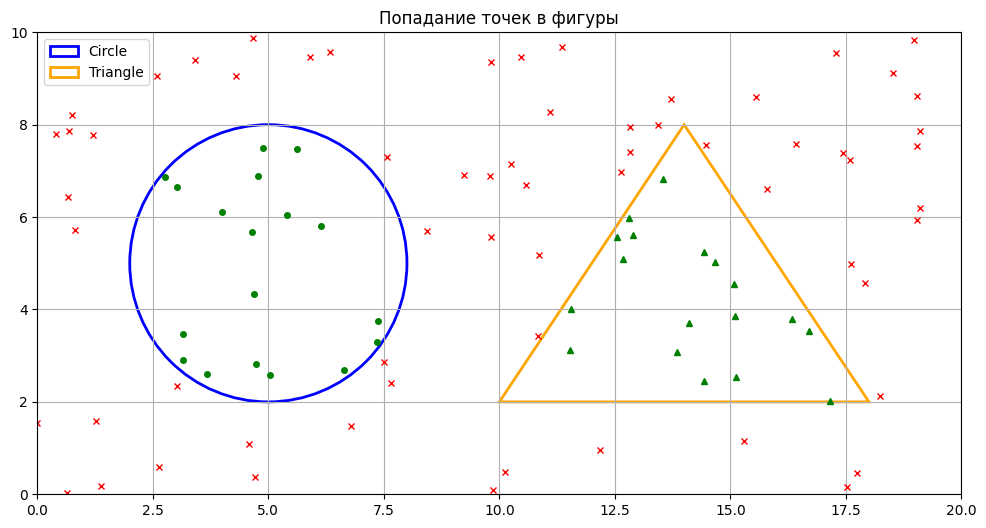

In [9]:
import math
import random
import matplotlib.pyplot as plt
import matplotlib.patches as patches

class Point:
    def __init__(self, x, y):
        self.x = x
        self.y = y
    
    def __str__(self):
        return f"({self.x:.2f}, {self.y:.2f})"
    
    def dist(self, other):
        return math.sqrt((self.x - other.x)**2 + (self.y - other.y)**2)

class Circle:
    def __init__(self, center: Point, radius: float):
        self.center = center
        self.radius = radius
        
    def point_in_circle(self, p: Point):
        return self.center.dist(p) <= self.radius

class Triangle:
    def __init__(self, p1: Point, p2: Point, p3: Point):
        self.p1 = p1
        self.p2 = p2
        self.p3 = p3
        
    def point_in_triangle(self, p: Point):
        def sign(p1, p2, p3):
            return (p1.x - p3.x) * (p2.y - p3.y) - (p2.x - p3.x) * (p1.y - p3.y)
        
        d1 = sign(p, self.p1, self.p2)
        d2 = sign(p, self.p2, self.p3)
        d3 = sign(p, self.p3, self.p1)
        
        has_neg = (d1 < 0) or (d2 < 0) or (d3 < 0)
        has_pos = (d1 > 0) or (d2 > 0) or (d3 > 0)
        
        return not (has_neg and has_pos)


def generate_points(xmin, xmax, ymin, ymax, n):
    return [Point(random.uniform(xmin, xmax), random.uniform(ymin, ymax)) for _ in range(n)]

circle = Circle(Point(5, 5), 3)
triangle = Triangle(Point(10, 2), Point(14, 8), Point(18, 2))

points = generate_points(0, 20, 0, 10, 100)

fig, ax = plt.subplots(figsize=(12, 6))
ax.set_aspect('equal')
ax.set_xlim(0, 20)
ax.set_ylim(0, 10)

circ_patch = patches.Circle((circle.center.x, circle.center.y), circle.radius, 
                            linewidth=2, edgecolor='blue', facecolor='none', label='Circle')
ax.add_patch(circ_patch)

tri_patch = patches.Polygon([(triangle.p1.x, triangle.p1.y), 
                             (triangle.p2.x, triangle.p2.y), 
                             (triangle.p3.x, triangle.p3.y)], 
                            linewidth=2, edgecolor='orange', facecolor='none', label='Triangle')
ax.add_patch(tri_patch)

for p in points:
    in_c = circle.point_in_circle(p)
    in_t = triangle.point_in_triangle(p)
    
    if in_c:
        ax.plot(p.x, p.y, 'go', markersize=4)
    elif in_t:
        ax.plot(p.x, p.y, 'g^', markersize=4)
    else:
        ax.plot(p.x, p.y, 'rx', markersize=4)

plt.legend()
plt.title("Попадание точек в фигуры")
plt.grid(True)
plt.show()

## Часть 2: Пересечение отрезков и окружностей

### Задание: Алгоритмы геометрического пересечения

Расширьте систему классов из Части 1 для проверки пересечения отрезков с окружностями и отрезков между собой.

**Класс Segment** содержит две вершины (`Point` A и B), с методами:
- `__str__` для отображения отрезка
- `length()` — вычисление длины отрезка
- `intersects_circle(circle)` — проверка пересечения отрезка с окружностью (возвращает список точек пересечения или пустой список)
- `intersects_segment(other)` — проверка пересечения двух отрезков (возвращает точку пересечения или None)

**Реализация алгоритмов пересечения:**
- **Отрезок ↔ Окружность**: Решение квадратного уравнения для расстояния от центра окружности до отрезка 
- **Отрезок ↔ Отрезок**: Метод на основе векторного произведения и параметризации (ориентация точек) 

**Генератор тестовых конфигураций:**
- `generate_segments(n, xmin, xmax, ymin, ymax)` — генератор n случайных отрезков в прямоугольнике
- Создайте несколько тестовых окружностей и отобразите все возможные случаи пересечения

**Визуализация с помощью matplotlib:**
- Отобразите окружность(и) и множество отрезков
- **Зелёные отрезки** — пересекают окружность (отметьте точки пересечения)
- **Синие отрезки** — полностью внутри окружности
- **Красные отрезки** — полностью вне окружности  
- **Жёлтые точки** — точки пересечения отрезков между собой
- Используйте легенду и сетку для наглядности


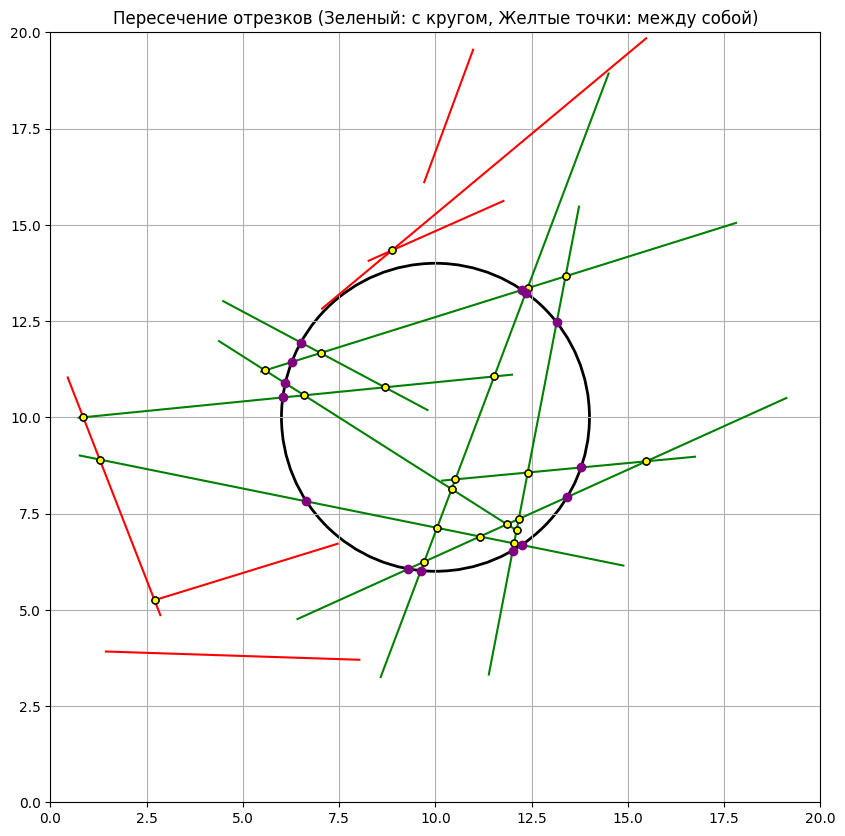

In [10]:
class Segment:
    def __init__(self, p1: Point, p2: Point):
        self.p1 = p1
        self.p2 = p2
        
    def __str__(self):
        return f"[{self.p1}, {self.p2}]"
    
    def length(self):
        return self.p1.dist(self.p2)
    
    def intersects_circle(self, circle: Circle):
        dx = self.p2.x - self.p1.x
        dy = self.p2.y - self.p1.y
        fx = self.p1.x - circle.center.x
        fy = self.p1.y - circle.center.y
        
        a = dx**2 + dy**2
        b = 2 * (fx*dx + fy*dy)
        c = (fx**2 + fy**2) - circle.radius**2
        
        delta = b**2 - 4*a*c
        intersections = []
        
        if delta >= 0 and a > 0:
            delta_sqrt = math.sqrt(delta)
            t1 = (-b - delta_sqrt) / (2*a)
            t2 = (-b + delta_sqrt) / (2*a)
            
            for t in [t1, t2]:
                if 0 <= t <= 1:
                    intersections.append(Point(self.p1.x + t*dx, self.p1.y + t*dy))
                    
        return intersections

    def intersects_segment(self, other):
        def cross_product(a, b):
            return a.x * b.y - a.y * b.x
        
        def subtract(a, b):
            return Point(a.x - b.x, a.y - b.y)

        p = self.p1
        r = subtract(self.p2, self.p1)
        q = other.p1
        s = subtract(other.p2, other.p1)
        
        r_cross_s = cross_product(r, s)
        q_minus_p = subtract(q, p)
        q_minus_p_cross_r = cross_product(q_minus_p, r)
        
        if r_cross_s == 0:
            return None
        
        t = cross_product(q_minus_p, s) / r_cross_s
        u = cross_product(q_minus_p, r) / r_cross_s
        
        if 0 <= t <= 1 and 0 <= u <= 1:
            return Point(p.x + t*r.x, p.y + t*r.y)
        return None

def generate_segments(n, xmin, xmax, ymin, ymax):
    segments = []
    for _ in range(n):
        p1 = Point(random.uniform(xmin, xmax), random.uniform(ymin, ymax))
        p2 = Point(random.uniform(xmin, xmax), random.uniform(ymin, ymax))
        segments.append(Segment(p1, p2))
    return segments

test_circle = Circle(Point(10, 10), 4)
segments = generate_segments(15, 0, 20, 0, 20)

fig, ax = plt.subplots(figsize=(10, 10))
ax.set_aspect('equal')
ax.set_xlim(0, 20)
ax.set_ylim(0, 20)

ax.add_patch(patches.Circle((test_circle.center.x, test_circle.center.y), test_circle.radius, 
                            color='black', fill=False, linewidth=2))

intersection_points = []
segment_intersects = []

for seg in segments:
    circle_inters = seg.intersects_circle(test_circle)
    is_fully_inside = test_circle.point_in_circle(seg.p1) and test_circle.point_in_circle(seg.p2)
    
    color = 'red'
    if circle_inters:
        color = 'green'
        intersection_points.extend(circle_inters)
    elif is_fully_inside:
        color = 'blue'
        
    ax.plot([seg.p1.x, seg.p2.x], [seg.p1.y, seg.p2.y], color=color, linewidth=1.5)
    
    for other_seg in segments:
        if seg == other_seg: continue
        pt = seg.intersects_segment(other_seg)
        if pt:
            ax.plot(pt.x, pt.y, 'o', color='yellow', markersize=5, markeredgecolor='black')

for p in intersection_points:
    ax.plot(p.x, p.y, 'o', color='purple', markersize=6)

plt.title("Пересечение отрезков (Зеленый: с кругом, Желтые точки: между собой)")
plt.grid(True)
plt.show()

## Часть 3: Формула Гаусса для площади многоугольника

### Задание: Вычисление площади произвольных многоугольников

Реализуйте класс **Polygon** для работы с многоугольниками и вычисления их площади по формуле Гаусса (шнуровки).

**Класс Polygon** содержит список вершин (`List[Point]`), с методами:
- `__init__(vertices: List[Point])` — конструктор (проверка на самопересечение опционально)
- `__str__()` — отображение координат вершин
- `area()` — вычисление площади по формуле Гаусса:  
  $S = \frac{1}{2} \left| \sum_{i=1}^{n} (x_i y_{i+1} - x_{i+1} y_i) \right| $,  
  где по соглашению \( (x_{n+1}, y_{n+1}) = (x_1, y_1) \).
- `is_convex()` — проверка выпуклости многоугольника
- `centroid()` — вычисление центра масс (средневзвешенных координат)




**Генератор многоугольников:**
- `generate_polygons(n, xmin, xmax, ymin, ymax, min_sides=3, max_sides=8)` — генератор n случайных выпуклых/вогнутых многоугольников
- `generate_regular_polygon(sides, center, radius)` — правильный многоугольник

**Визуализация с помощью matplotlib:**
- Отобразите несколько многоугольников разных форм
- **Заливка** пропорциональна площади (alpha=0.5, разные цвета)
- **Подписи** с точной площадью рядом с каждым многоугольником
- **Сравнение** с площадью по разбиению на треугольники (для проверки)
- **Легенда** с площадями и типом (выпуклый/вогнутый)


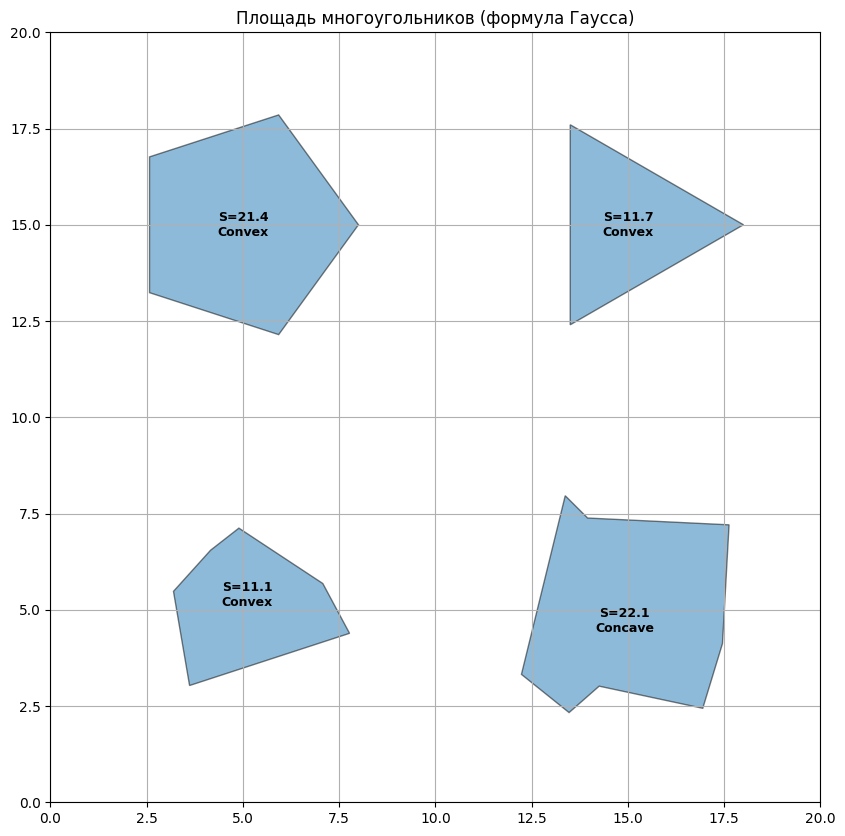

In [11]:
class Polygon:
    def __init__(self, vertices):
        self.vertices = vertices
        
    def __str__(self):
        return "Polygon: " + ", ".join([str(p) for p in self.vertices])
    
    def area(self):
        n = len(self.vertices)
        s = 0.0
        for i in range(n):
            j = (i + 1) % n
            s += self.vertices[i].x * self.vertices[j].y
            s -= self.vertices[j].x * self.vertices[i].y
        return 0.5 * abs(s)

    def centroid(self):
        cx = sum(p.x for p in self.vertices) / len(self.vertices)
        cy = sum(p.y for p in self.vertices) / len(self.vertices)
        return Point(cx, cy)
    
    def is_convex(self):
        n = len(self.vertices)
        if n < 3: return False
        
        cross_products = []
        for i in range(n):
            p1 = self.vertices[i]
            p2 = self.vertices[(i + 1) % n]
            p3 = self.vertices[(i + 2) % n]
            
            val = (p2.x - p1.x)*(p3.y - p2.y) - (p2.y - p1.y)*(p3.x - p2.x)
            cross_products.append(val)
            
        is_pos = all(cp > 0 for cp in cross_products)
        is_neg = all(cp < 0 for cp in cross_products)
        return is_pos or is_neg

def generate_regular_polygon(sides, center, radius):
    verts = []
    angle_step = 2 * math.pi / sides
    for i in range(sides):
        angle = i * angle_step
        x = center.x + radius * math.cos(angle)
        y = center.y + radius * math.sin(angle)
        verts.append(Point(x, y))
    return Polygon(verts)

def generate_random_polygon(n, center, radius):
    angles = sorted([random.uniform(0, 2*math.pi) for _ in range(n)])
    verts = []
    for ang in angles:
        r = radius * random.uniform(0.5, 1.0)
        x = center.x + r * math.cos(ang)
        y = center.y + r * math.sin(ang)
        verts.append(Point(x, y))
    return Polygon(verts)

polys = [
    generate_regular_polygon(5, Point(5, 15), 3),
    generate_regular_polygon(3, Point(15, 15), 3),
    generate_random_polygon(6, Point(5, 5), 3),
    generate_random_polygon(8, Point(15, 5), 4)
]

fig, ax = plt.subplots(figsize=(10, 10))
ax.set_aspect('equal')
ax.set_xlim(0, 20)
ax.set_ylim(0, 20)

for poly in polys:
    pts = [(p.x, p.y) for p in poly.vertices]
    pts.append(pts[0])
    
    area = poly.area()
    type_str = "Convex" if poly.is_convex() else "Concave"
    
    p_patch = patches.Polygon(pts[:-1], alpha=0.5, edgecolor='black', label=f'S={area:.1f}')
    ax.add_patch(p_patch)
    
    c = poly.centroid()
    ax.text(c.x, c.y, f"S={area:.1f}\n{type_str}", ha='center', va='center', fontsize=9, fontweight='bold')

plt.title("Площадь многоугольников (формула Гаусса)")
plt.grid(True)
plt.show()

# Прикладная задача
## Оценка площади озера по спутниковому снимку 

По результатам сегментации спутникового изображения береговая линия озера аппроксимирована многоугольником с вершинами в пиксельных координатах. Известно пространственное разрешение снимка (например, 1 пиксель = 2 м по обеим осям).

### Задача
- Перевести координаты вершин из пикселей в метры, умножив каждую координату на масштаб:  
  $x'_i = s_x * x_i,  y'_i = s_y * y_i$  (для квадратного пикселя s_x = s_y = s).
- С помощью формулы Гаусса вычислить площадь озера в квадратных метрах и гектарах:  
  $S = 1/2 * | Σ_{i=1}^{n} (x'_i y'_{i+1} - x'_{i+1} y'_i) |, где (x'_{n+1}, y'_{n+1}) = (x'_1, y'_1)$; затем S_га = S / 10 000.
- Сравнить полученную площадь с заданным порогом (например, 10 гектаров), чтобы классифицировать объект как «малое озеро» или «крупный водоём».


## Вариант 1: Озеро в Карелии (малый водоём)

**Название объекта:** Озеро Малое Круглое  
**Местоположение:** Республика Карелия  

**Координаты береговой линии (пиксели на снимке):**

[
(145, 87), (162, 76), (188, 81), (201, 94),
(208, 112), (194, 128), (172, 135), (151, 130),
(133, 117), (126, 101), (129, 89)
]

**Пространственное разрешение:** 1 пиксель = 1.5 метра  
**Порог классификации:** 5 гектаров (для малых озёр)  

---
## Вариант 2: Старица реки Волги

**Название объекта:** Старица "Подкова"  
**Местоположение:** Волго-Ахтубинская пойма, Астраханская область  

**Координаты (пиксели):**

[
(320, 180), (340, 165), (370, 160), (400, 165),
(420, 180), (435, 200), (440, 225), (430, 250),
(410, 265), (380, 270), (350, 260), (330, 240),
(315, 220), (310, 200)
]

**Пространственное разрешение:** 1 пиксель = 2.0 метра  
**Порог классификации:** 8 гектаров  

---

## Вариант 3: Городской пруд (искусственный водоём)

**Название объекта:** Парковый пруд "Зеркальный"  
**Местоположение:** Городской парк, Москва  

**Координаты (пиксели):**

[
(80, 120), (110, 100), (150, 95), (190, 105),
(220, 125), (235, 155), (220, 185), (190, 205),
(150, 210), (110, 200), (80, 180), (65, 150)
]

**Пространственное разрешение:** 1 пиксель = 0.5 метра (высокое разрешение)  
**Порог классификации:** 2 гектара (для городских объектов)  

---

## Вариант 4: Альпийское ледниковое озеро

**Название объекта:** Ледниковое озеро "Голубое"  
**Местоположение:** Кавказские горы, высота 2800 м  

**Координаты (пиксели):**

[
(50, 70), (85, 55), (125, 50), (165, 60),
(195, 80), (210, 110), (200, 145), (170, 170),
(130, 180), (90, 170), (60, 150), (40, 120),
(35, 95)
]

**Пространственное разрешение:** 1 пиксель = 4.0 метра (низкое разрешение горной съёмки)  
**Порог классификации:** 15 гектаров (горные озёра)  

---

## Вариант 5: Водохранилище на малой реке

**Название объекта:** Водохранилище "Приозерное"  
**Местоположение:** Смоленская область  

**Координаты (пиксели):**

[
(200, 100), (250, 80), (310, 85), (360, 105),
(400, 140), (420, 185), (405, 230), (360, 260),
(300, 270), (240, 250), (200, 220), (180, 180),
(175, 140), (185, 115)
]

**Пространственное разрешение:** 1 пиксель = 3.0 метра  
**Порог классификации:** 20 гектаров (водохранилища)  

---

## Вариант 6: Техногенный карьер, заполненный водой

**Название объекта:** Затопленный карьер "Северный"  
**Местоположение:** Кемеровская область, бывший угольный разрез  

**Координаты (пиксели):**

[
(90, 60), (130, 40), (180, 35), (230, 45),
(270, 70), (295, 105), (300, 145), (285, 185),
(250, 215), (200, 225), (150, 210), (110, 180),
(85, 140), (80, 100)
]

**Пространственное разрешение:** 1 пиксель = 2.5 метра  
**Порог классификации:** 10 гектаров (техногенные объекты)  


--- Расчет для объекта: Старица 'Подкова' (Астраханская область) ---
Масштаб: 1 пиксель = 2.0 м
Вычисленная площадь:  42,150.00 м²
Площадь в гектарах:   4.2150 га
Порог классификации:  8.0 га
------------------------------------------------
РЕЗУЛЬТАТ:            Малое озеро


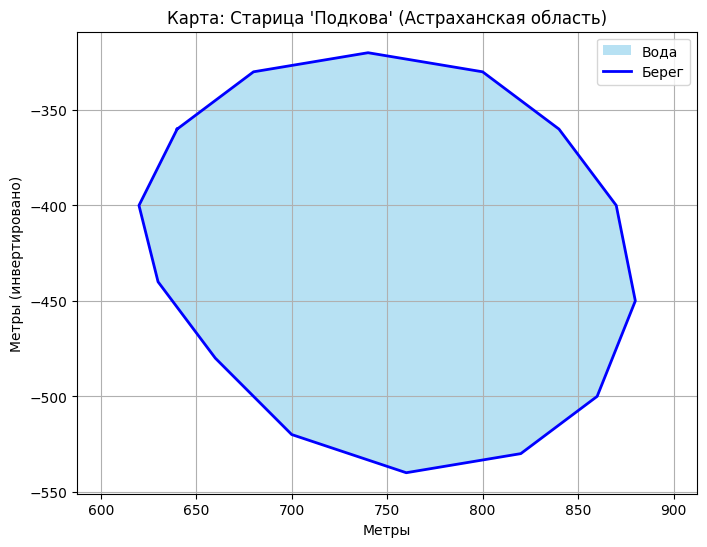

In [12]:
variant_data = {
    "name": "Старица 'Подкова' (Астраханская область)",
    "coords_px": [
        (320, 180), (340, 165), (370, 160), (400, 165),
        (420, 180), (435, 200), (440, 225), (430, 250),
        (410, 265), (380, 270), (350, 260), (330, 240),
        (315, 220), (310, 200)
    ],
    "scale": 2.0,
    "threshold": 8.0
}

print(f"--- Расчет для объекта: {variant_data['name']} ---")

real_coords = []
scale = variant_data['scale']

for x_px, y_px in variant_data['coords_px']:
    real_coords.append(Point(x_px * scale, y_px * scale))

lake_polygon = Polygon(real_coords)

area_sq_m = lake_polygon.area()
area_hectares = area_sq_m / 10000.0

threshold = variant_data['threshold']
if area_hectares > threshold:
    classification = "Крупный водоём"
else:
    classification = "Малое озеро"

print(f"Масштаб: 1 пиксель = {scale} м")
print(f"Вычисленная площадь:  {area_sq_m:,.2f} м²")
print(f"Площадь в гектарах:   {area_hectares:,.4f} га")
print(f"Порог классификации:  {threshold} га")
print(f"------------------------------------------------")
print(f"РЕЗУЛЬТАТ:            {classification}")

x_vals = [p.x for p in real_coords] + [real_coords[0].x]
y_vals = [p.y for p in real_coords] + [real_coords[0].y]

plt.figure(figsize=(8, 6))
plt.fill(x_vals, [-y for y in y_vals], 'skyblue', alpha=0.6, label='Вода')
plt.plot(x_vals, [-y for y in y_vals], 'b-', linewidth=2, label='Берег')

plt.title(f"Карта: {variant_data['name']}")
plt.xlabel("Метры")
plt.ylabel("Метры (инвертировано)")
plt.axis('equal')
plt.legend()
plt.grid(True)
plt.show()